In [57]:
import cv2

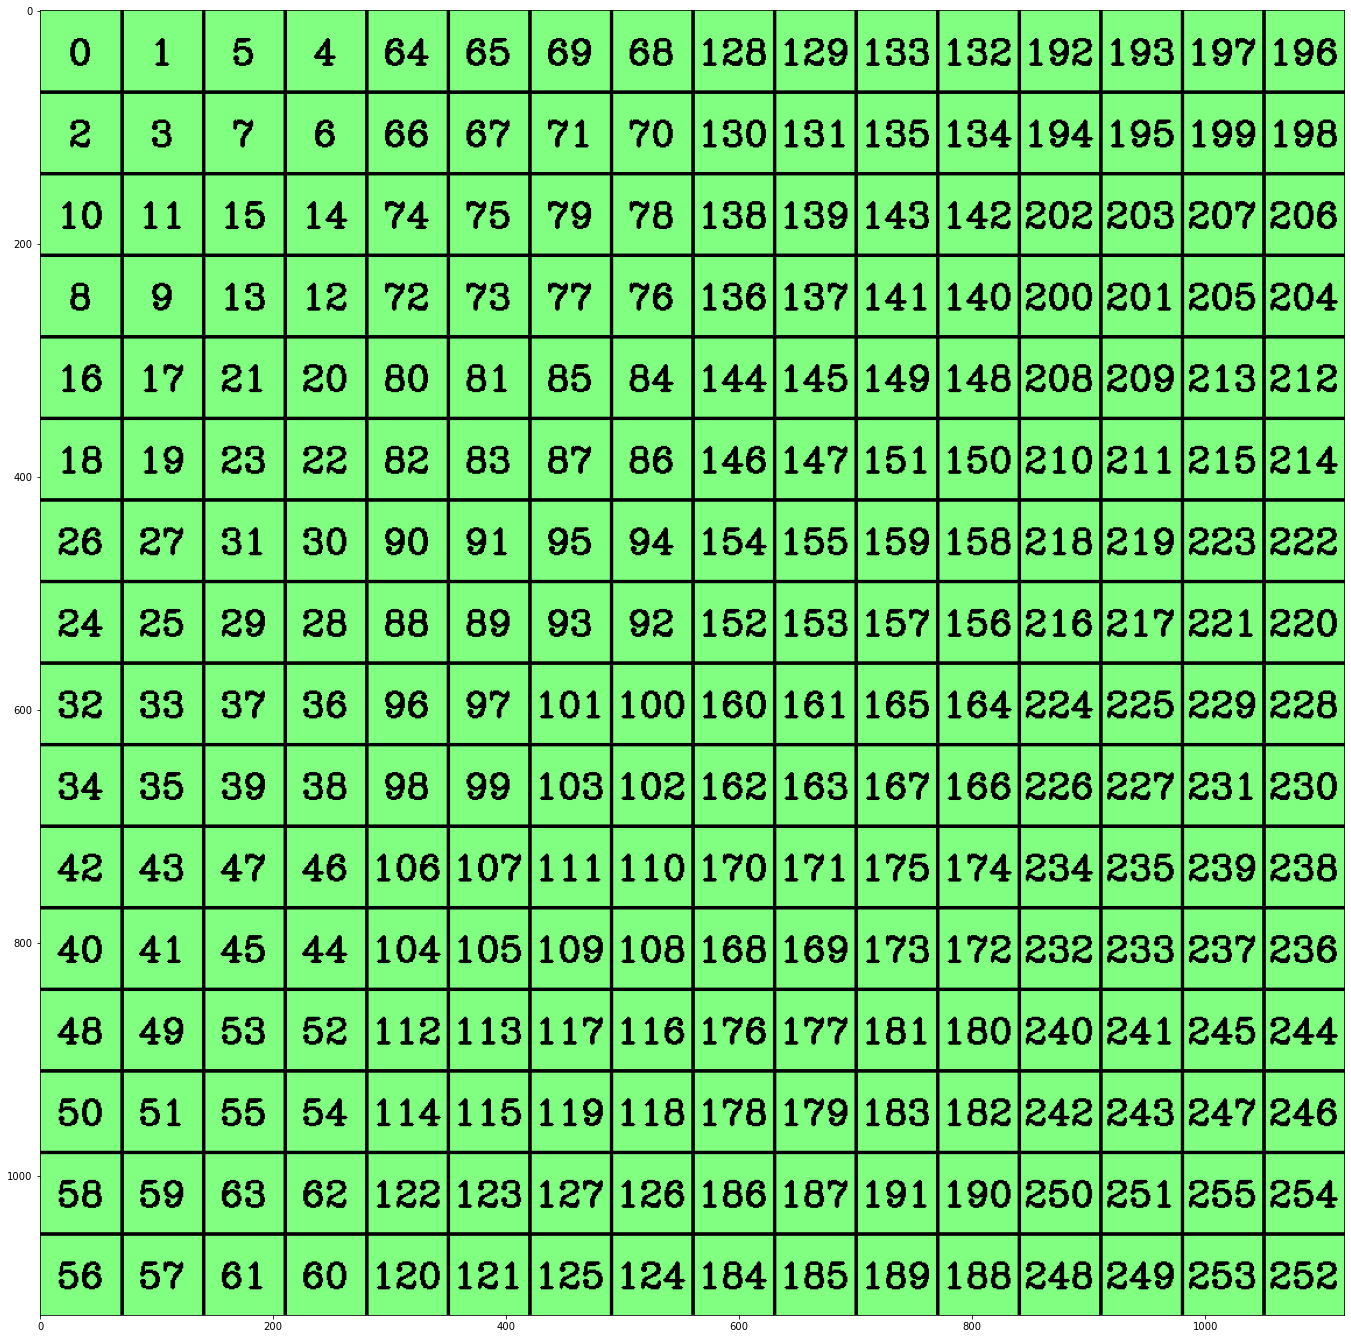

True

In [58]:
import numpy as np
data = np.array([
    [0, 1, 5, 4],
    [2, 3, 7, 6],
    [10, 11, 15, 14],
    [8, 9, 13, 12]
], dtype = np.float32)

font_face = cv2.FONT_HERSHEY_COMPLEX
font_scale = 1.5
thickness = 2
whitespace = 0.06
bgcolor = (128, 255, 128)
fgcolor = (0, 0, 0)
edgecolor = (0, 0, 0)
edgewidth = 2

tsizes = []
for i in range(256):
    
    tsize, _ = cv2.getTextSize(str(i), font_face, font_scale, thickness)
    tsizes.append((tsize[0], tsize[1]))
tsizes = np.array(tsizes)

max_tsize = np.max(tsizes)

box_size = int(max_tsize + round(whitespace * max_tsize) * 2)


data_array = np.zeros((box_size * 16, box_size * 16, 3), dtype = np.uint8)
data_array[:] = np.array(bgcolor)

for i in range(16):
    for j in range(16):
        blockx = j // 4
        blocky = i // 4
        blockx_offset = j % 4
        blocky_offset = i % 4

        startx = j * box_size
        starty = i * box_size

        number = blockx * 64 + blocky * 16 + data[blocky_offset, blockx_offset]
        number = int(number)
        tw, th = tsizes[number]
        
        tx, ty = startx + int(0.5 * (box_size - tw)), \
                 starty + th + int(0.5 * (box_size - th))
    

        cv2.putText(data_array, f'{number}', (tx, ty), font_face, font_scale, fgcolor, thickness, cv2.FILLED)

for i in range(1, 16):
    cv2.line(data_array, (i * box_size, 0), (i * box_size, data_array.shape[0] - 1), edgecolor, edgewidth)
    cv2.line(data_array, (0, i * box_size), (data_array.shape[1] - 1, i * box_size), edgecolor, edgewidth)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (24, 24))
plt.imshow(data_array[..., ::-1])
plt.show()

cv2.imwrite('../docs/images/z-memory-layout.png', data_array)

